# A Fuzzy Set Extension of Schelling's Spatial Segregation Model
# (Ishida, 2023, Journal of Computational Social Science, https://doi.org/10.1007/s42001-023-00234-7)
## Crisp Schelling model
### Atsushi Ishida (aishida@kwansei.ac.jp)

In [1]:
import fuzzy_Schelling_utils as fs
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.rcParams["font.size"] = 12
# random seed
np.random.seed(8931)

In [2]:
# Global parameters
NUM_ROW = 50
NUM_COL = 50
NUM_TRIALS = 100
NUM_RUN = 100
PERCENT_SIMILAR_WANTED = [0.3, 0.5, 0.7]
DENSITY = [0.3, 0.5, 0.7]
labels = ["d = 0.3", "d = 0.5", "d = 0.7"]

# Single run

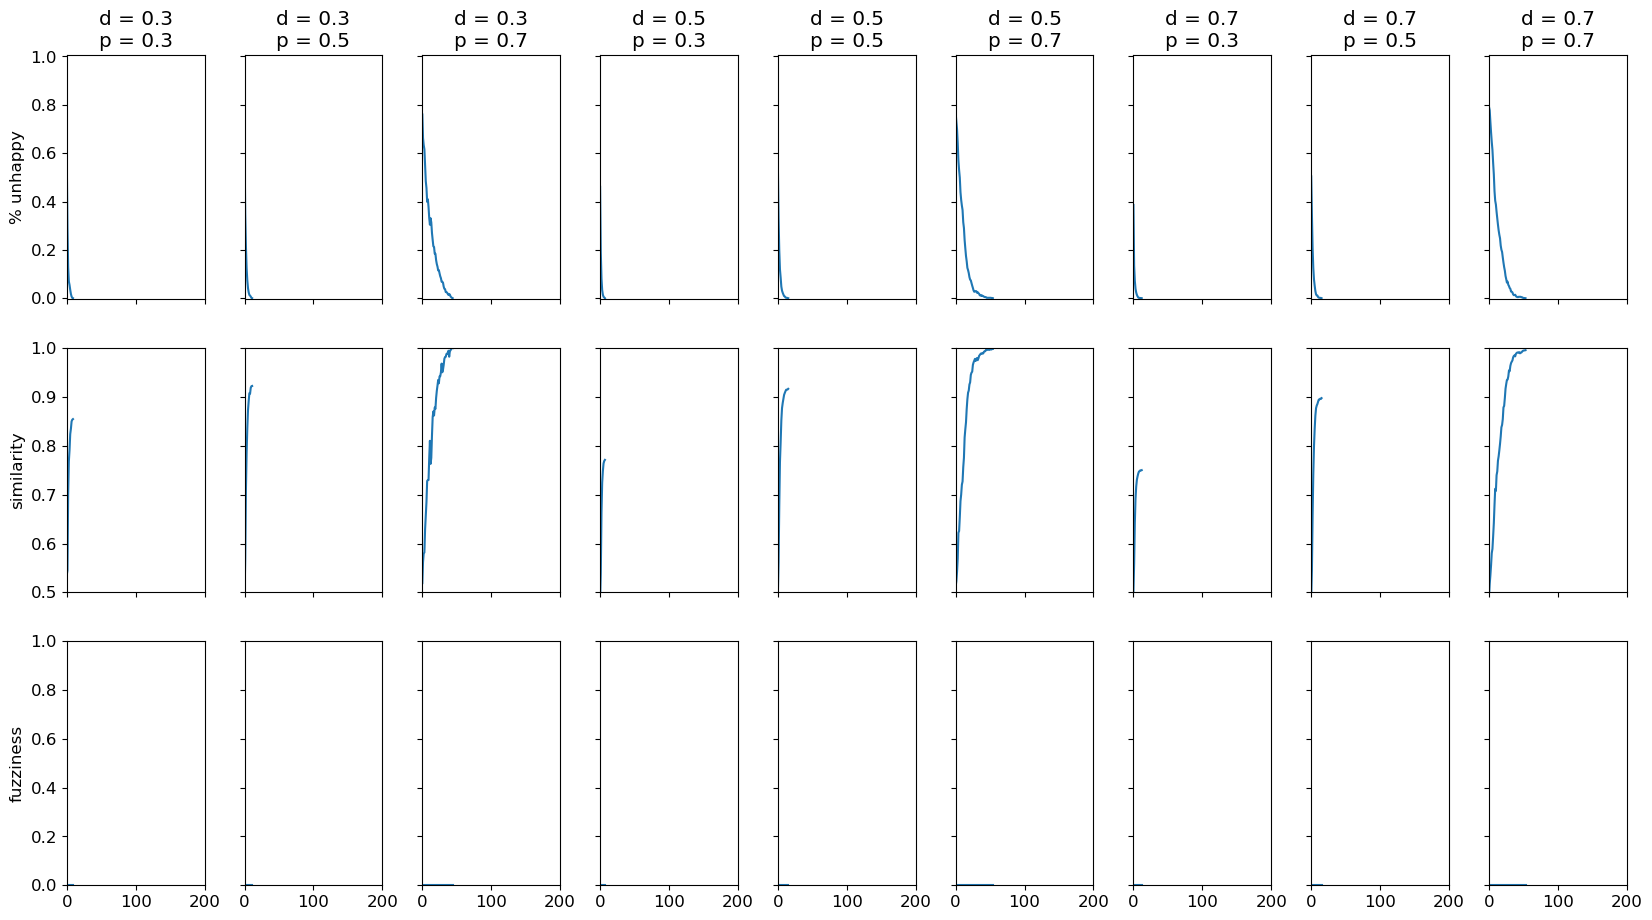

In [3]:
fig = plt.figure(figsize=(16, 10))
dst_subfigs = fig.subfigures(1, len(DENSITY))

for i, dst_subfig in enumerate(dst_subfigs):
    psw_subfigs = dst_subfig.subfigures(1, len(PERCENT_SIMILAR_WANTED))
    for j, psw_subfig in enumerate(psw_subfigs):
        ax = psw_subfig.subplots(3, 1)

        unhappy_percent_trend, average_similarity_trend, average_fuzzy_trend = fs.trial_simple_Schelling(
            NUM_ROW = NUM_ROW,
            NUM_COL = NUM_COL,
            DENSITY = DENSITY[i],
            PERCENT_SIMILAR_WANTED = PERCENT_SIMILAR_WANTED[j],
            NUM_TRIALS = NUM_TRIALS,
            )

        t = len(unhappy_percent_trend)
        ax[0].plot(np.arange(t), unhappy_percent_trend)
        ax[1].plot(np.arange(t), average_similarity_trend)
        ax[2].plot(np.arange(t), average_fuzzy_trend)
        ax[0].set_ylim([-0.005, 1.005])
        ax[1].set_ylim([0.5, 1])
        ax[2].set_ylim([0, 1])
        ax[0].set_xlim([0, 200])
        ax[1].set_xlim([0, 200])
        ax[2].set_xlim([0, 200])
        ax[0].axes.xaxis.set_ticklabels([])
        ax[1].axes.xaxis.set_ticklabels([])
        ax[0].set_title("d = " + str(DENSITY[i]) + "\n" +
                        "p = " + str(PERCENT_SIMILAR_WANTED[j]))
        if (i == 0 and j == 0):
            ax[0].set_ylabel("% unhappy")
            ax[1].set_ylabel("similarity")
            ax[2].set_ylabel("fuzziness")
        if not (i == 0 and j == 0):
            ax[0].axes.yaxis.set_ticklabels([])
            ax[1].axes.yaxis.set_ticklabels([])
            ax[2].axes.yaxis.set_ticklabels([])

plt.subplots_adjust(hspace=0.2, wspace=0.2, bottom=0.05)
# plt.savefig('TeX/trends_simple_Schelling.pdf',bbox_inches='tight')
plt.show();

## Crisp Schelling tendencies at equilibrium

Warning: the following code might take a long time to run!

In [4]:
eq_time_means = []
eq_time_stds = []
eq_sim_means = []
eq_sim_stds = []

for d in [0.3, 0.5, 0.7]:
    eq_times = []
    eq_sims = []

    for run in range(NUM_RUN):
        eq_time = []
        eq_sim = []
        for p in [0.3, 0.5, 0.7]:
            unhappy_percent_trend, average_similarity_trend, average_fuzzy_trend = fs.trial_simple_Schelling(
                        NUM_ROW = NUM_ROW,
                        NUM_COL = NUM_COL,
                        DENSITY = d,
                        PERCENT_SIMILAR_WANTED = p,
                        NUM_TRIALS = NUM_TRIALS,
                        )
            eq_time.append(len(unhappy_percent_trend))
            eq_sim.append(average_similarity_trend[-1])
        eq_times.append(eq_time)
        eq_sims.append(eq_sim)

    eq_times_mean = np.array(eq_times).mean(axis=0)
    eq_times_std = np.array(eq_times).std(axis=0)
    eq_sims_mean = np.array(eq_sims).mean(axis=0)
    eq_sims_std = np.array(eq_sims).std(axis=0)

    eq_time_means.append(list(eq_times_mean))
    eq_time_stds.append(list(eq_times_std))
    eq_sim_means.append(list(eq_sims_mean))
    eq_sim_stds.append(list(eq_sims_std))

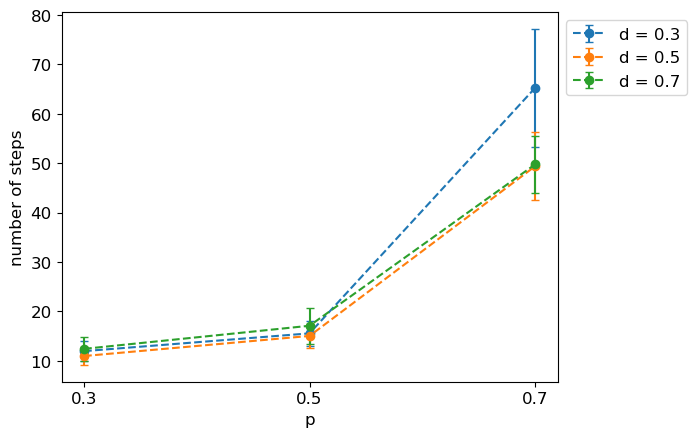

In [5]:
for i in range(3):
    plt.errorbar([0.3, 0.5, 0.7], eq_time_means[i], yerr=eq_time_stds[i], capsize=3, linestyle='--', marker='o', label=labels[i])
plt.ylabel("number of steps")
plt.xlabel("p")
plt.xticks([0.3, 0.5, 0.7])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.savefig('TeX/crisp_eq_time.pdf',bbox_inches='tight')
plt.show();

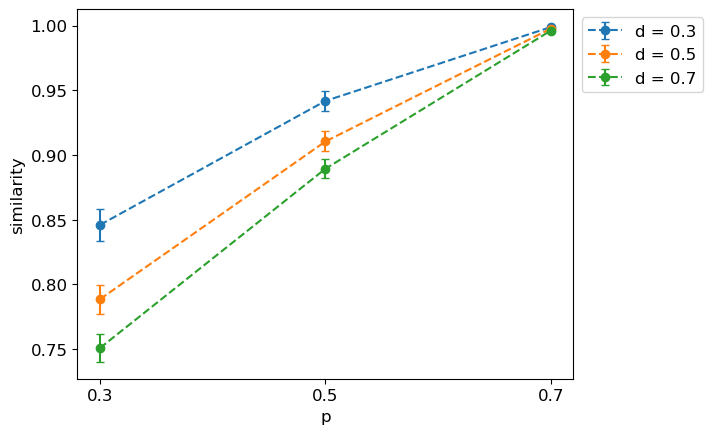

In [6]:
for i in range(3):
    plt.errorbar([0.3, 0.5, 0.7], eq_sim_means[i], yerr=eq_sim_stds[i], capsize=3, linestyle='--', marker='o', label=labels[i])
plt.ylabel("similarity")
plt.xlabel("p")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.xticks([0.3, 0.5, 0.7])
plt.savefig('TeX/crisp_eq_sim.pdf',bbox_inches='tight')
plt.show();